In [2]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

file_name = next(iter(uploaded))

df = pd.read_csv(file_name)

selected_columns = ['SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney', 'Food&Beverages', 'InflightEntertainment', 'Wifi&Connectivity']

df[selected_columns] = df[selected_columns].apply(pd.to_numeric, errors='coerce')


selected_df = df[selected_columns]


for column in selected_columns:
    print(f"\nStats for {column}:\n")

    non_nan_count = selected_df[column].count()
    total_sum = selected_df[column].sum(skipna=True)

    average = total_sum / non_nan_count if non_nan_count > 0 else 0

    value_counts = selected_df[column].value_counts().sort_index()

    for value, count in value_counts.items():
        percentage = count / non_nan_count * 100
        print(f"Value {int(value)}: Count = {count}, Percentage = {percentage:.2f}%")

    print(f"Overall Average: {average:.2f}")


    nan_count = selected_df[column].isna().sum()
    print(f"Number of NaN values: {nan_count}\n")


Saving BA_AirlineReviews.csv to BA_AirlineReviews.csv

Stats for SeatComfort:

Value 1: Count = 829, Percentage = 23.12%
Value 2: Count = 594, Percentage = 16.57%
Value 3: Count = 852, Percentage = 23.77%
Value 4: Count = 815, Percentage = 22.73%
Value 5: Count = 495, Percentage = 13.81%
Overall Average: 2.88
Number of NaN values: 116


Stats for CabinStaffService:

Value 1: Count = 696, Percentage = 19.47%
Value 2: Count = 497, Percentage = 13.91%
Value 3: Count = 625, Percentage = 17.49%
Value 4: Count = 715, Percentage = 20.01%
Value 5: Count = 1041, Percentage = 29.13%
Overall Average: 3.25
Number of NaN values: 127


Stats for GroundService:

Value 1: Count = 872, Percentage = 30.54%
Value 2: Count = 360, Percentage = 12.61%
Value 3: Count = 563, Percentage = 19.72%
Value 4: Count = 632, Percentage = 22.14%
Value 5: Count = 428, Percentage = 14.99%
Overall Average: 2.78
Number of NaN values: 846


Stats for ValueForMoney:

Value 1: Count = 1202, Percentage = 32.49%
Value 2: Count 

In [3]:
!pip install matplotlib


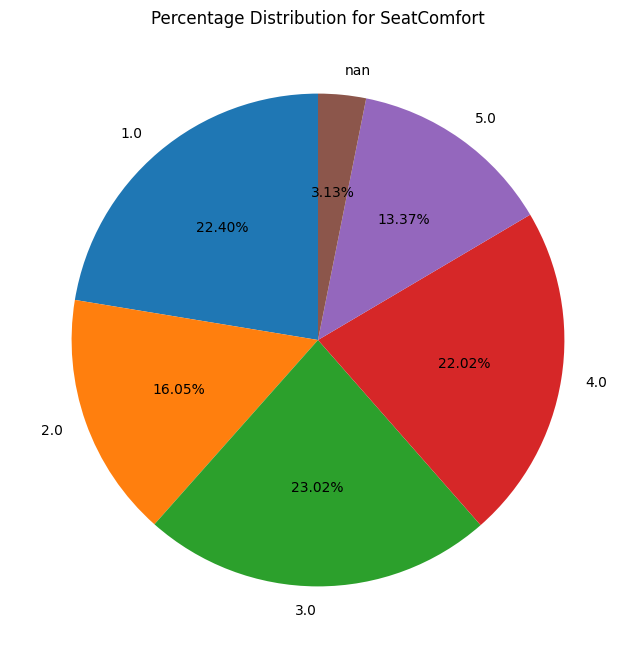

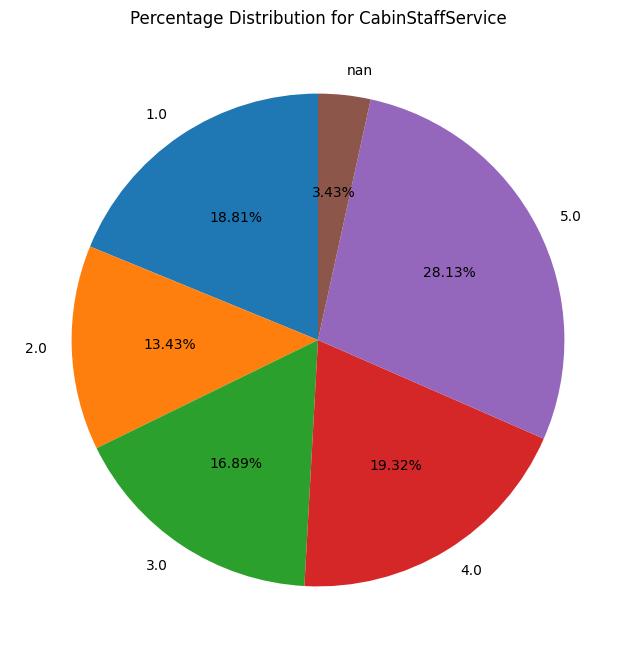

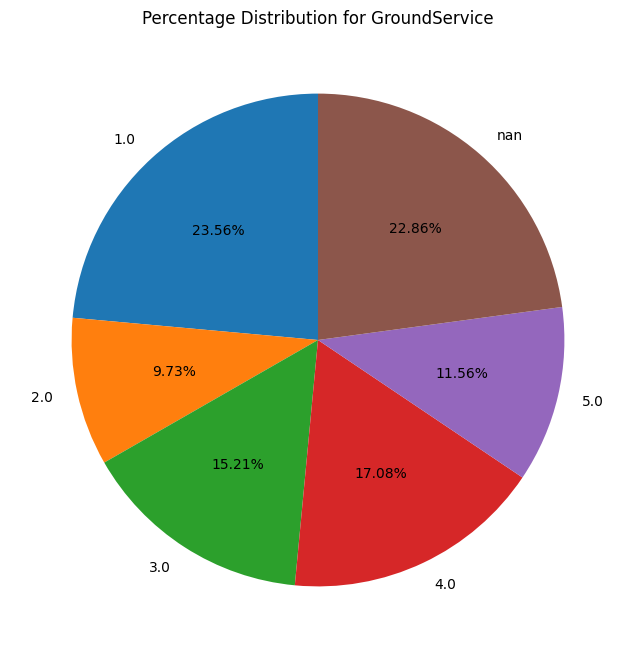

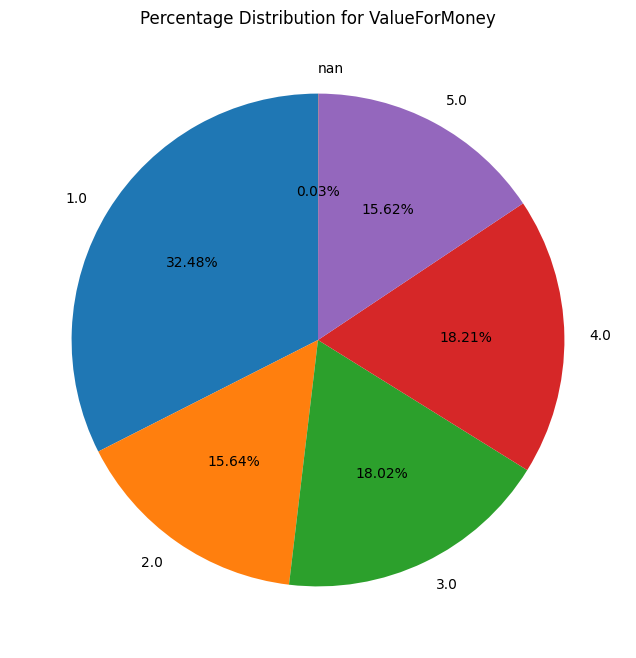

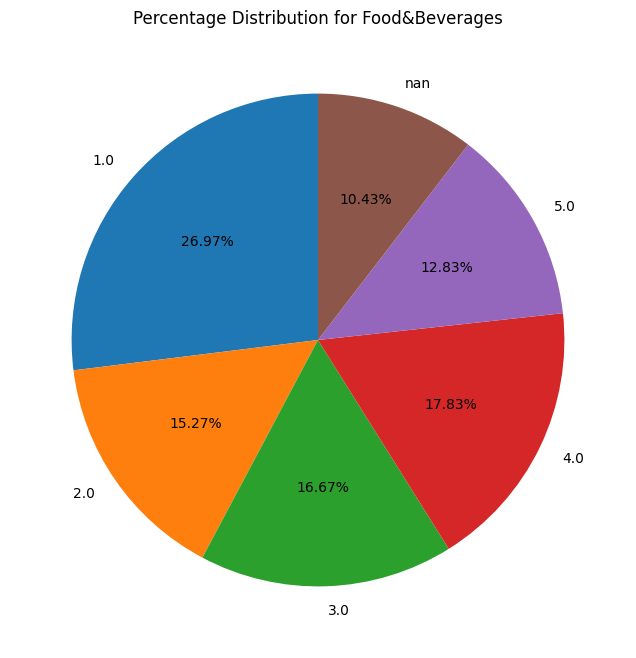

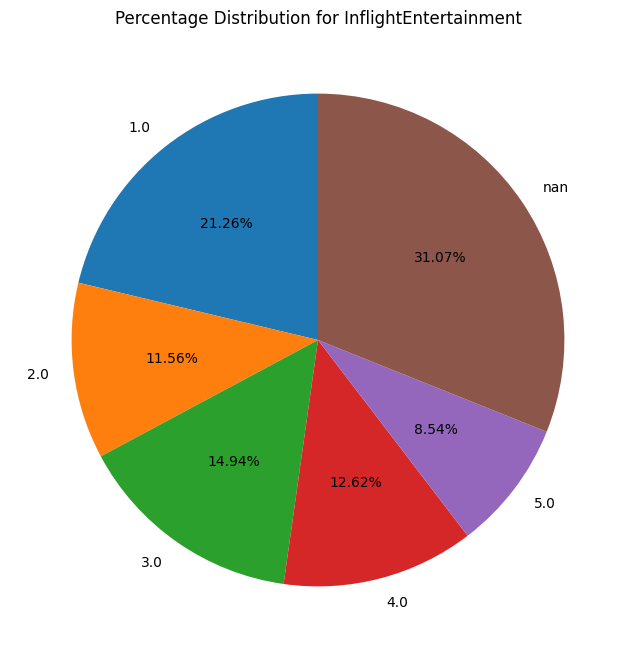

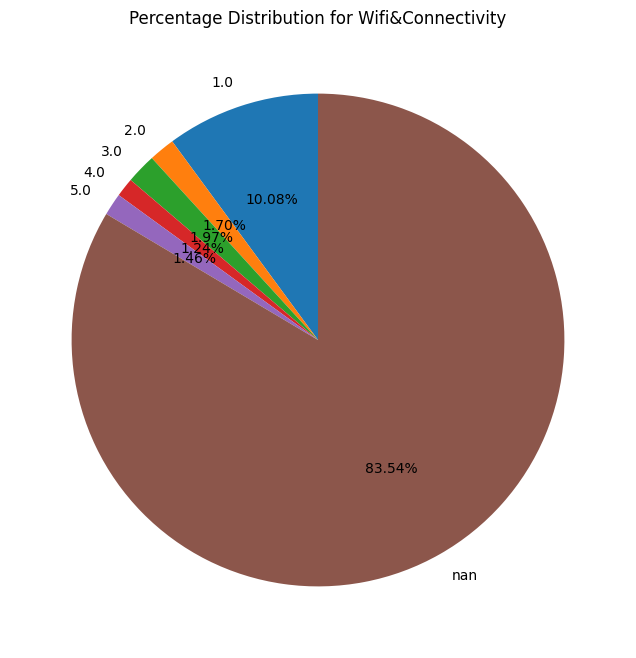

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files


for column in selected_columns:

    value_counts = selected_df[column].value_counts(dropna=False).sort_index()
    percentages = value_counts / value_counts.sum() * 100

    plt.figure(figsize=(8, 8))
    plt.pie(percentages, labels=percentages.index, autopct='%1.2f%%', startangle=90)
    plt.title(f'Percentage Distribution for {column}')
    plt.show()


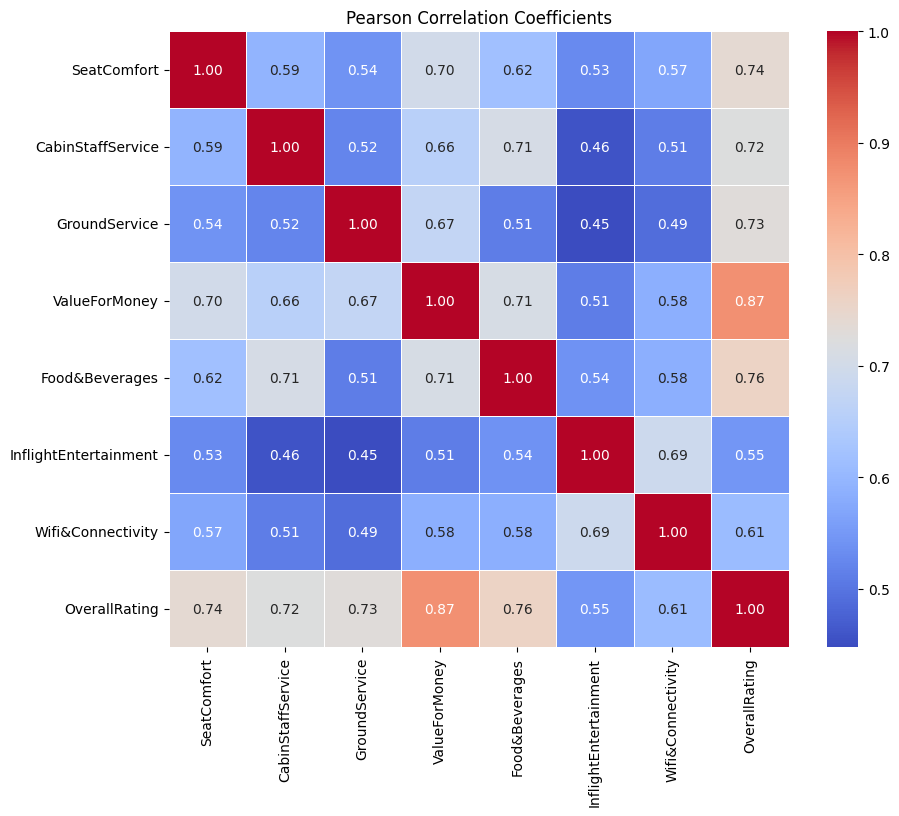

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_columns = selected_columns + ['OverallRating']

correlation_df = df[correlation_columns]

correlation_matrix = correlation_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Coefficients')
plt.show()
